# Welter issue #17
## Teff vs order
### Part 2: Make a Table for the multi temps and fill factors

Michael Gully-Santiago  
Monday, June 28, 2016  

See [Issue17](https://github.com/BrownDwarf/welter/issues/17)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

In [3]:
import pandas as pd

## Retrieve aggregated data for multi-$T_{\rm eff}$ Starfish runs for all spectral orders.

In [4]:
#! head ../data/analysis/IGRINS_mix_emcee_last200.csv

In [5]:
IG_raw = pd.read_csv('../data/analysis/IGRINS_mix_emcee_last200.csv')

In [6]:
IG_raw.head()

,wl_start,wl_end,band,number,tell_trans,m_val,wl_center,Teff_05p,Teff_50p,Teff_95p,...,Teff2_05p,Teff2_50p,Teff2_95p,logO2_05p,logO2_50p,logO2_95p,ff_05p,ff_50p,ff_95p,inference
0,18092.0,18346.0,H,0,0.117487,98,18219.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,17914.0,18165.0,H,1,0.342583,99,18039.5,3931.021262,4196.127470,4295.104192,...,3007.612092,3061.969155,3199.046408,NaN,NaN,NaN,0.709056,0.818038,0.871110,True
2,17739.0,17988.0,H,2,0.666035,100,17863.5,3924.922737,4221.269053,4293.039898,...,3001.564404,3033.193625,3118.474481,NaN,NaN,NaN,0.702850,0.777690,0.842168,True
3,17568.0,17815.0,H,3,0.827089,101,17691.5,3808.010328,4155.798016,4276.041452,...,3006.686455,3075.791225,3208.632792,NaN,NaN,NaN,0.704421,0.786773,0.869482,True
4,17400.0,17645.0,H,4,0.904758,102,17522.5,4037.643678,4240.880406,4294.305977,...,3001.559295,3025.211248,3082.416705,NaN,NaN,NaN,0.801685,0.840407,0.920849,True


It's missing the logOmega2 columns for some reason...

## Plot of $T_{eff}$ vs. spectral order

In [7]:
orders = IG_raw
N_orders = len(orders)

In [8]:
sns.set_style('ticks')

In [9]:
sns.set_context('paper')

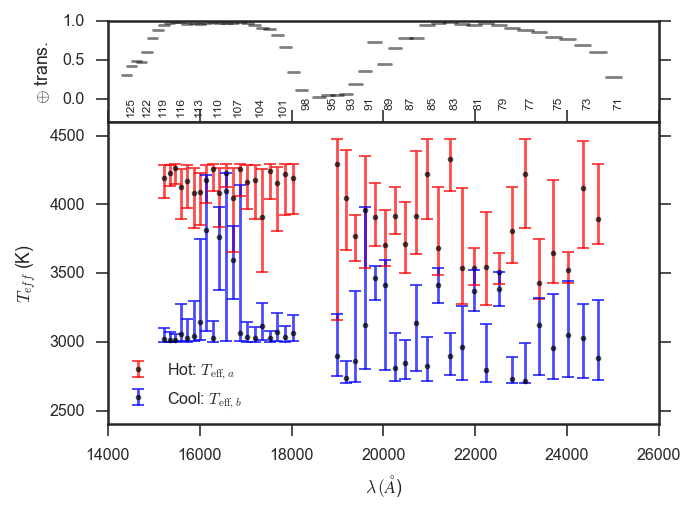

In [10]:
#plt.subplot(211)
fig = plt.figure(figsize=(8.5, 3.5))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.3, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 2
    if orders.m_val[i] > 99:
        print_every = 3
    if (orders.number.values[i] % print_every) == 0:
        ax1.text(orders.wl_center[i], -0.07, '{}'.format(orders.m_val.values[i]),
                 fontsize=6, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.errorbar(orders.wl_center, orders.Teff_50p, 
             yerr=(orders.Teff_50p-orders.Teff_05p,
                  orders.Teff_95p-orders.Teff_50p), ecolor='r', capthick=1,
            fmt='k.', alpha=0.7, label='Hot: $T_{\mathrm{eff}, a}$')
ax.errorbar(orders.wl_center, orders.Teff2_50p,
             yerr=(orders.Teff2_50p-orders.Teff2_05p, 
                  orders.Teff2_95p-orders.Teff2_50p), ecolor='b', capthick=1,
            fmt='k.', alpha=0.7, label='Cool: $T_{\mathrm{eff}, b}$')


ax.set_ylim(2400, 4600)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$T_{eff}$ (K)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='lower left')
plt.savefig('../document/figures/LkCa4_HK_mixTeff_by_order.pdf', bbox_inches='tight')

In [11]:
vals = orders.Teff2_50p == orders.Teff2_50p
vals.sum()

43

In [12]:
len(orders)

54

## Add multi-Teff rows to the Latex Table of $T_{\rm eff}$ vs. order.

In [13]:
latex_out = pd.read_csv('../data/analysis/latex_TeffOrder_table.csv')

In [14]:
latex_new = pd.DataFrame()

In [15]:
latex_out.tail()

,Order,Instrument,wavelength_range,Teff,Teff1,Teff2,f
53,80,IGRINS,22085$-$22393,$3157^{+132}_{-124}$,NaN,NaN,NaN
54,79,IGRINS,22360$-$22671,$3437^{+79}_{-60}$,NaN,NaN,NaN
55,78,IGRINS,22643$-$22957,$3197^{+43}_{-43}$,NaN,NaN,NaN
56,77,IGRINS,22932$-$23251,$3273^{+52}_{-49}$,NaN,NaN,NaN
57,76,IGRINS,23230$-$23552,$3321^{+54}_{-53}$,NaN,NaN,NaN


### Merge single and double results

In [16]:
finite_orders = orders[orders.Teff_50p == orders.Teff_50p]

In [17]:
fo = finite_orders.sort_values('wl_center')

In [18]:
latex_new['Order'] = fo.m_val

In [19]:
fo['plus_error1'] = fo.Teff_95p-fo.Teff_50p
fo['minus_error1'] = fo.Teff_50p-fo.Teff_05p
fo['plus_error2'] = fo.Teff2_95p-fo.Teff2_50p
fo['minus_error2'] = fo.Teff2_50p-fo.Teff2_05p
fo['f_plus_error'] = fo.ff_95p-fo.ff_50p
fo['f_minus_error'] = fo.ff_50p-fo.ff_05p

In [20]:
latex_new['Teff1'] = ('$'+fo.Teff_50p.apply(lambda x:"{}".format(int(x)))+'^{+'+
                     fo.plus_error1.apply(lambda x:"{}".format(int(x)))+'}_{-'+
                     fo.minus_error1.apply(lambda x:"{}".format(int(x)))+'}$')

In [21]:
latex_new['Teff2'] = ('$'+fo.Teff2_50p.apply(lambda x:"{}".format(int(x)))+'^{+'+
                     fo.plus_error2.apply(lambda x:"{}".format(int(x)))+'}_{-'+
                     fo.minus_error2.apply(lambda x:"{}".format(int(x)))+'}$')

In [22]:
latex_new['ff'] = ('$'+fo.ff_50p.apply(lambda x:"{:0.2f}".format(x))+'^{+'+
                     fo.f_plus_error.apply(lambda x:"{:0.2f}".format(x))+'}_{-'+
                     fo.f_minus_error.apply(lambda x:"{:0.2f}".format(x))+'}$')

In [23]:
fo['wavelength_range'] = (fo.wl_start.apply(lambda x:"{}".format(int(np.floor(x))))+'$-$'+
       fo.wl_end.apply(lambda x:"{}".format(int(np.ceil(x)))))

In [24]:
latex_new['wavelength_range'] = fo.wavelength_range

In [25]:
latex_merge = pd.merge(latex_out.drop(['Teff1', 'Teff2', 'f'], axis=1), latex_new, how='outer', on='Order')

In [26]:
latex_merge.Order = latex_merge.Order.astype(int)

There's some missing data.  We only added IGRINS data, and the wavelength ranges are the same.

In [27]:
latex_merge.Instrument[latex_merge.Instrument!=latex_merge.Instrument] = 'IGRINS'

In [28]:
bi = latex_merge.wavelength_range_x != latex_merge.wavelength_range_x
latex_merge.wavelength_range_x[bi] = latex_merge.wavelength_range_y[bi]

In [29]:
latex_merge = latex_merge.rename(columns={"wavelength_range_x":"wavelength_range"}).drop(['wavelength_range_y'], axis=1)

Sort by wavelength.

In [30]:
columns_in_order = latex_merge.columns
igr = latex_merge.Instrument == 'IGRINS'
esp = latex_merge.Instrument == 'ESPaDoNs'
latex_merge = pd.concat([latex_merge[esp], 
           pd.merge(latex_merge[igr], fo[['wl_center', 'm_val']],
                    how='outer', left_on="Order", right_on="m_val"
                   ).sort_values("wl_center")]
         ).drop(['m_val', 'wl_center'], axis=1)[columns_in_order].reset_index(drop=True)

In [31]:
latex_merge.fillna(value='$\cdots$')[43:50]

,Order,Instrument,wavelength_range,Teff,Teff1,Teff2,ff
43,101,IGRINS,17568$-$17815,$<3543$,$4155^{+120}_{-347}$,$3075^{+132}_{-69}$,$0.79^{+0.08}_{-0.08}$
44,100,IGRINS,17739$-$17988,$<3598$,$4221^{+71}_{-296}$,$3033^{+85}_{-31}$,$0.78^{+0.06}_{-0.07}$
45,99,IGRINS,17914$-$18165,$<3552$,$4196^{+98}_{-265}$,$3061^{+137}_{-54}$,$0.82^{+0.05}_{-0.11}$
46,94,IGRINS,18855$-$19117,$\cdots$,$4293^{+185}_{-1132}$,$2899^{+304}_{-150}$,$0.81^{+0.07}_{-0.39}$
47,93,IGRINS,19053$-$19318,$\cdots$,$4044^{+353}_{-378}$,$2740^{+119}_{-36}$,$0.81^{+0.08}_{-0.19}$
48,92,IGRINS,19256$-$19524,$\cdots$,$3770^{+155}_{-183}$,$2859^{+510}_{-149}$,$0.56^{+0.18}_{-0.21}$
49,91,IGRINS,19462$-$19734,$3464^{+70}_{-67}$,$3962^{+389}_{-426}$,$3126^{+857}_{-325}$,$0.68^{+0.18}_{-0.56}$


In [32]:
latex_merge.to_latex('../document/tables/tbl_order_results_all_raw.tex', na_rep='$\cdots$', index=False, escape=False)

## The end.